# Create maps for representing Bloch spheres

For that I'll use the Husimi distribution of totally polarized states poinitg onto some direction $\bf{n}$
$$Q(\phi,\theta) = \frac{1}{2\pi} \langle Nj |_{\bf{n}} \varrho | Nj \rangle_{\bf{n}}$$

## Load libraries

In [2]:
using HDF5, PyPlot
using BasicQuIn

# functions to generate the map
include("blochSphere.jl");

  likely near In[2]:1
in pystring_query at /home/iapellaniz/.julia/v0.5/PyCall/src/conversions.jl
sys:1: PyGIWarning: Gtk was imported without specifying a version first. Use gi.require_version('Gtk', '3.0') before import to ensure that the right version gets loaded.


Function to generate map data

## Generate map

The function `generateMap()` takes 3 arguments, (1) the state itself, (2) and (3) $J_z$ and $J_y$ respectivelly based on the representation of the state

In [23]:
i = 4
phi = i*pi/6
density = generateMap(eig((cos(phi)*s_x(17)+sin(phi)*s_y(17))^2)[2][:,1],s_z(17),s_y(17),40);

Create the map

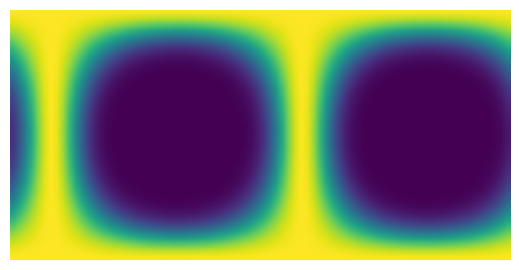

In [24]:
fig = figure()
fig[:set_size_inches](5, 5)
ax = axes([0,0,1.,1.], frameon=false)
ax[:set_axis_off]()

ax[:get_xaxis]()[:set_visible](false)
ax[:get_yaxis]()[:set_visible](false)

fig[:add_axes](ax)
ax[:imshow](density,cmap="viridis", interpolation="bilinear", origin="upper", vmin=0
)
ax[:margins](0,0)
savefig("blochMap.png", bbox_inches="tight", transparent=true, pad_inches=0)

In [25]:
localPath = pwd()
run(`blender -b --verbose -1 $localPath/blochSphere.blend -o blochSphere_# -E CYCLES -F PNG -x 1  -f 1 > rendering.log`);

Color management: using fallback mode for management
Read new prefs: /home/iapellaniz/.config/blender/2.76/config/userpref.blend
read blend: /home/iapellaniz/Physics/PhD/Julia/Plots4Thesis/assats/blochSphere.blend
Fra:1 Mem:21.41M (0.00M, Peak 63.76M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, RenderLayer | Synchronizing object | Point
Fra:1 Mem:21.41M (0.00M, Peak 63.76M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, RenderLayer | Synchronizing object | Camera
Fra:1 Mem:21.41M (0.00M, Peak 63.76M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, RenderLayer | Synchronizing object | Axises
Fra:1 Mem:21.41M (0.00M, Peak 63.76M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, RenderLayer | Synchronizing object | Lamp
Fra:1 Mem:21.41M (0.00M, Peak 63.76M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, RenderLayer | Synchronizing object | wireframe
Fra:1 Mem:21.41M (0.00M, Peak 78.11M) | Time:00:04.11 | Mem:0.00M, Peak:0.00M | Scene, RenderLayer | Synchronizing object | UVspher

LoadError: LoadError: failed process: Process(`blender -b --verbose -1 /home/iapellaniz/Physics/PhD/Julia/Plots4Thesis/assats/blochSphere.blend -o blochSphere_# -E CYCLES -F PNG -x 1 -f 1 > rendering.log`, ProcessExited(1)) [1]
while loading In[25], in expression starting on line 2

Your PNG image is ready! 360x360 PNG Bloch sphere


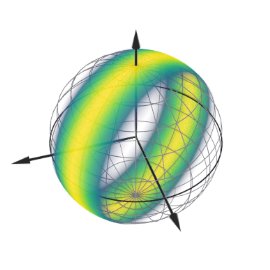

In [26]:
fig = figure()
fig[:set_size_inches](2.5, 2.5)
ax = axes([0,0,1.,1.], frameon=false)
ax[:set_axis_off]()

ax[:get_xaxis]()[:set_visible](false)
ax[:get_yaxis]()[:set_visible](false)

imshow(imread("blochSphere_1.png"),interpolation="bilinear")
println("Your PNG image is ready! 360x360 PNG Bloch sphere")